In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [27]:
url="https://www.hubertiming.com/results/2018MLK" #open link
html = urlopen(url)

In [28]:
soup = BeautifulSoup(html)

In [29]:
data = []
allrows= soup.find_all("tr")
for row in allrows :
    row_list = row.find_all("td")
    dataRow= []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
  
data = data[6:] 

In [30]:
header_list = []
col_headers = soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Time', 'Chip Pace', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [31]:
df = pd.DataFrame(data)

In [32]:
df.columns = header_list
print(df.head())

  Place   Bib                     Name Gender Age      City State Chip Time  \
0     2  1080  NEED NAME KAISER RUNNER      M  25  PORTLAND    OR     17:31   
1     3  1275               DAN FRANEK      M  52  PORTLAND    OR     18:15   
2     4  1223              PAUL TAYLOR      M  54  PORTLAND    OR     18:31   
3     5  1245              THEO KINMAN      M  22                     19:31   
4     6  1185           MELISSA GIRGIS      F  27  PORTLAND    OR     19:39   

  Chip Pace Gender Place Age Group Age Group Place Time to Start Gun Time  
0      5:39      2 of 78   M 21-39         2 of 33          0:09    17:40  
1      5:53      3 of 78   M 40-54         1 of 27          0:07    18:22  
2      5:58      4 of 78   M 40-54         2 of 27          0:07    18:38  
3      6:17      5 of 78   M 21-39         3 of 33          0:09    19:40  
4      6:20     1 of 113   F 21-39         1 of 53          0:07    19:46  


In [33]:
df.shape

(190, 14)

In [34]:
df2 = df.dropna(how='any')
df.shape

(190, 14)

In [35]:
df2['Year'] = 2018

In [36]:
df2['Chip Time'] = df2['Chip Time'].apply(lambda x : x.rjust(5, '0').rjust(6, ':').rjust(8, '0'))
df2['ChipTime_minutes'] = df['Chip Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [37]:
time_list = df2['Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
#print(time_mins)

In [38]:
df2['Runner_mins'] = time_mins
df2.head(5)

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Year,ChipTime_minutes,Runner_mins
0,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,00:17:31,5:39,2 of 78,M 21-39,2 of 33,0:09,17:40,2018,1051,17.516667
1,3,1275,DAN FRANEK,M,52,PORTLAND,OR,00:18:15,5:53,3 of 78,M 40-54,1 of 27,0:07,18:22,2018,1095,18.250000
2,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,00:18:31,5:58,4 of 78,M 40-54,2 of 27,0:07,18:38,2018,1111,18.516667
3,5,1245,THEO KINMAN,M,22,,,00:19:31,6:17,5 of 78,M 21-39,3 of 33,0:09,19:40,2018,1171,19.516667
4,6,1185,MELISSA GIRGIS,F,27,PORTLAND,OR,00:19:39,6:20,1 of 113,F 21-39,1 of 53,0:07,19:46,2018,1179,19.650000


Text(0.5, 1.0, 'Comparsion of average minutes run by male and female')

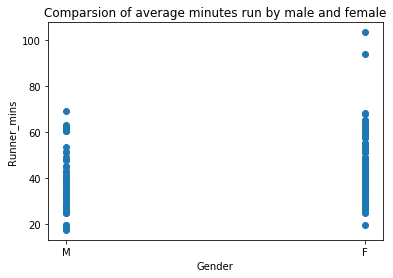

In [39]:
plt.scatter(df2['Gender'], df2['Runner_mins'])
plt.xlabel('Gender')
plt.ylabel('Runner_mins')
plt.title("Comparsion of average minutes run by male and female") 

In [40]:
df2.describe(include=[np.number])

,Year,ChipTime_minutes,Runner_mins
count,190.0,190.000000,190.000000
mean,2018.0,1778.689474,42.613333
std,0.0,1032.170638,14.824586
min,2018.0,60.000000,17.516667
25%,2018.0,1505.000000,29.154167
50%,2018.0,1816.000000,39.708333
75%,2018.0,2510.000000,54.550000
max,2018.0,3598.000000,103.450000


Text(0, 0.5, 'Run time')

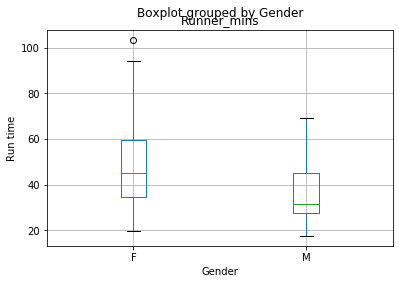

In [41]:
df2.boxplot(column='Runner_mins', by = 'Gender')
plt.ylabel('Run time')

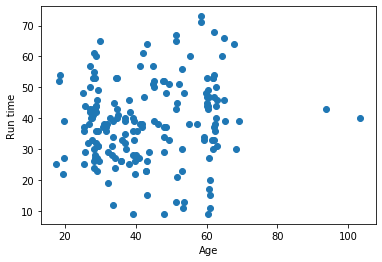

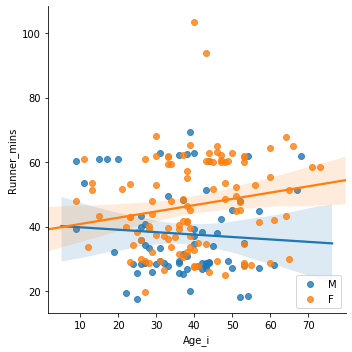

In [42]:
import seaborn as sns, numpy as np
df2['Age_i'] = round(pd.to_numeric(df2['Age'], errors='coerce'))
df2.dropna(how ='any', inplace = True)
df = plt.scatter(df2['Runner_mins'], df2['Age_i'])
df = plt.ylabel('Run time')
df= plt.xlabel('Age')
df = plt.show()

sns.lmplot( x='Age_i', y='Runner_mins', data=df2, fit_reg=True, hue='Gender', legend=False)
plt.legend(loc='lower right')


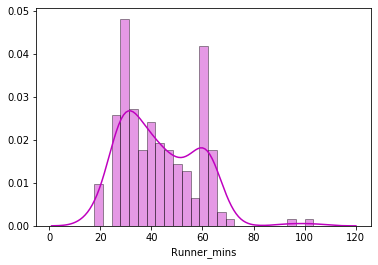

In [43]:
import seaborn as sns, numpy as np
x = df2['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

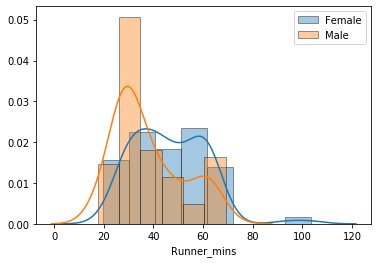

In [44]:
f_fuko = df2.loc[df2['Gender']=='F']['Runner_mins']
m_fuko = df2.loc[df2['Gender']=='M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [46]:
g_stats = df2.groupby("Gender", as_index=True).describe()
print(g_stats)

         Year                                                       \
        count    mean  std     min     25%     50%     75%     max   
Gender                                                               
F       110.0  2018.0  0.0  2018.0  2018.0  2018.0  2018.0  2018.0   
M        71.0  2018.0  0.0  2018.0  2018.0  2018.0  2018.0  2018.0   

       ChipTime_minutes               ... Runner_mins              Age_i  \
                  count         mean  ...         75%         max  count   
Gender                                ...                                  
F                 110.0  1851.045455  ...   59.816667  103.450000  110.0   
M                  71.0  1641.056338  ...   46.591667   69.183333   71.0   

                                                           
             mean        std  min   25%   50%   75%   max  
Gender                                                     
F       39.745455  13.478108  9.0  30.0  39.0  48.0  73.0  
M       37.352113  12.814165

Text(0, 0.5, 'Run time')

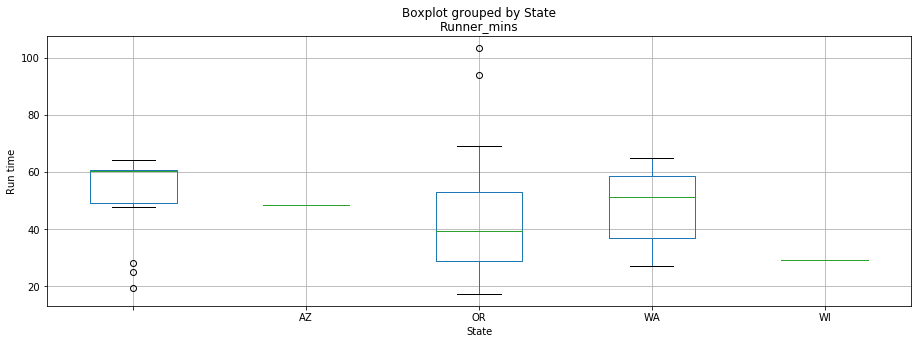

In [47]:
df2.boxplot(column='Runner_mins', by = 'State')
plt.ylabel('Run time')

Text(0, 0.5, 'Run time')

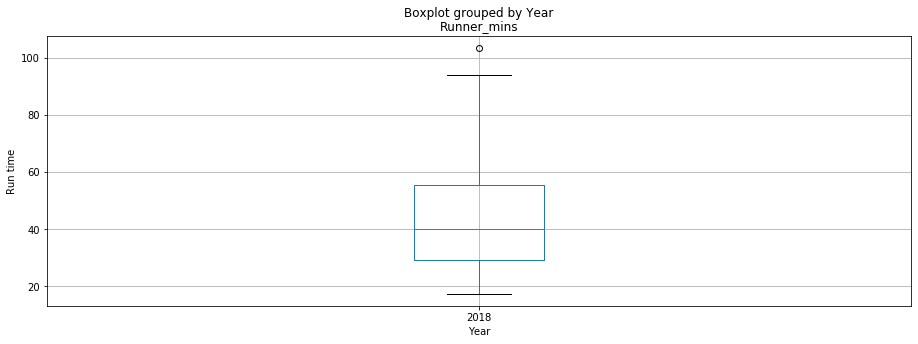

In [48]:
df2.boxplot(column='Runner_mins', by = 'Year')
plt.ylabel('Run time')

In [49]:
df2.to_csv('final2018.csv')